# AIEC-ML-02: Complementary Notebook

In this Python notebook, we want to find out how we can predict the rent for a flat in Munich based on the size of it. While this is an oversimplification of the topic itself, it walks us through the steps in an understandable manner.

# Prerequisites: we are importing some libraries into our Python session.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

# 1. Data. Let's load some data from a prepared csv file and prepare the data.

We load data from Munich Rent Index.
First 20 data points for training, next 20 for testing.

The goal is to predict the net rent based on the floor area (in $m^2$).

In [15]:
housing_df = pd.read_csv('rentindex2015.csv', sep=' ', quoting=2, nrows=40)
housing_df_train = housing_df[:20]
housing_df_test = housing_df[20:40]

Here is our loaded training data:

In [16]:
housing_df_train

,rent,rentsqm,area,rooms,yearc,district,resprop,housingst,ww,heatingc,tiledbath,bathextra,citchen
0,608.40,12.67,48.0,2.0,1957.5,Untergiesing,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,780.00,13.00,60.0,2.0,1983.0,Bogenhausen,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,822.60,7.48,110.0,5.0,1957.5,Obergiesing,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,500.00,8.62,58.0,2.0,1957.5,Schwanthalerhöhe,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,595.00,8.50,70.0,3.0,1972.0,Aubing...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,960.00,11.85,81.0,3.0,2006.5,Schwanthalerhöhe,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1120.00,11.55,97.0,3.0,2000.5,Hadern,1.0,0.0,0.0,0.0,1.0,1.0,1.0
7,685.00,13.70,50.0,2.0,1972.0,Maxvorstadt,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8,767.50,10.81,71.0,3.0,1983.0,Untergiesing,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,565.68,7.44,76.0,3.0,1957.5,Untergiesing,0.0,0.0,0.0,1.0,1.0,1.0,0.0


And here's the test data:

In [17]:
housing_df_test

,rent,rentsqm,area,rooms,yearc,district,resprop,housingst,ww,heatingc,tiledbath,bathextra,citchen
20,693.36,10.83,64.0,3.0,1957.5,Sendling,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21,803.05,5.95,135.0,5.0,2010.0,Schwanthalerhöhe,0.0,0.0,0.0,0.0,1.0,1.0,0.0
22,580.00,13.49,43.0,2.0,1939.0,Ludwigvorstadt-Isarvorstadt,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23,412.58,7.93,52.0,2.0,1957.5,Obergiesing,0.0,0.0,0.0,0.0,1.0,1.0,0.0
24,700.00,12.50,56.0,2.0,1992.5,Obergiesing,0.0,0.0,0.0,0.0,1.0,1.0,1.0
25,360.00,6.92,52.0,2.0,1957.5,Obergiesing,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,426.35,5.33,80.0,3.0,1918.0,Untergiesing,0.0,1.0,0.0,1.0,1.0,1.0,0.0
27,686.00,12.47,55.0,2.0,2000.5,Thalkirchen...,0.0,0.0,0.0,0.0,1.0,0.0,1.0
28,974.00,7.16,136.0,4.0,1918.0,Au-Haidhausen,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,847.00,13.03,65.0,2.0,1918.0,Au-Haidhausen,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We can also plot the data where we suspect some relationship. As far as this example goes, let's take a look at the relationship between size of the place and rent. Visually, we might be able to spot some intuitive relationship.

### Plot data

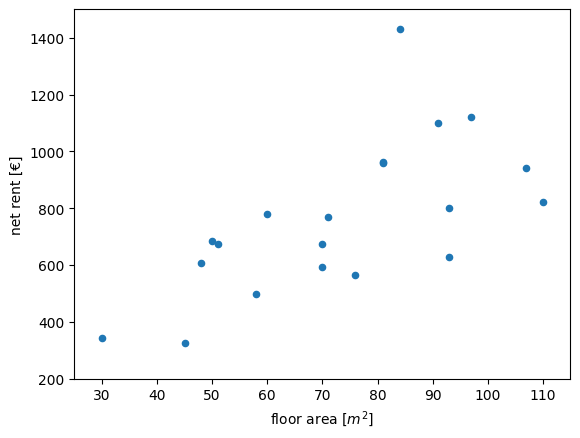

In [18]:
def configure_plot(plt, ax):
    '''Configure the plot
    :param plt: matplotlib.pyplot
    :param ax: matplotlib.axes
    '''
    ax.set_xlabel('floor area [$m^2$]')
    ax.set_ylabel('net rent [€]')
    xminmax = [25,115]
    yminmax = [200, 1500]
    plt.xlim(xminmax)
    plt.ylim(yminmax)

fig, axes = plt.subplots(1, 1)
housing_df_train.plot.scatter(x='area', y='rent', ax=axes)
configure_plot(plt, axes)
plt.show()


# 2. Select the model

As we look at the data, we might assume that a linear relationship exists. So we are applying linear regression now to our training data. In the following cell, we define that we want one degree of freedom, resulting in a line. Further, we then use a training to fit a line to the data, and plot the result.

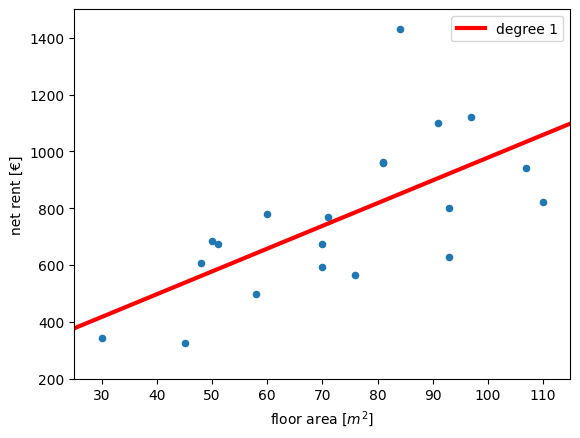

In [19]:
degree = 1 # linear regression
z = np.polyfit(housing_df_train.area, housing_df_train.rent, degree)
poly = np.poly1d(z)

# plot the regression line
fig, axes = plt.subplots(1, 1)
xp = np.linspace(20, 120, 100)
plt.plot(xp, poly(xp), lw=3, color='r', label="degree 1")

# plot the data
housing_df_train.plot.scatter(x='area', y='rent', ax=axes)
configure_plot(plt, axes)
axes.legend()
plt.show()

# 3. Loss function / evaluation

We can see from the plot below that our data points are having some distance to the fitted line. The sum of the squared distances from the actual data points and the model line results is what we want to optimize (squared so that we only deal with positive results).  

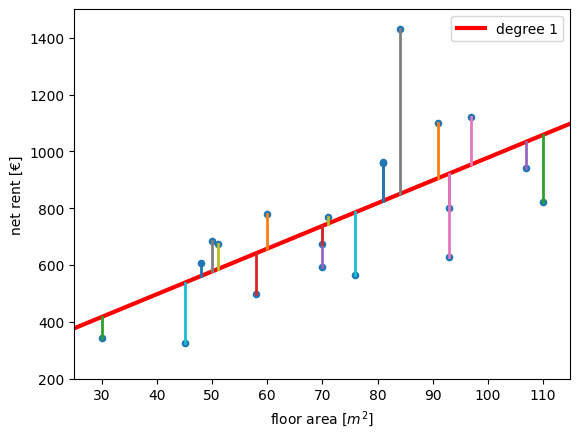

In [20]:
degree = 1 # linear regression
z = np.polyfit(housing_df_train.area, housing_df_train.rent, degree)
poly = np.poly1d(z)

# plot the regression line
fig, axes = plt.subplots(1, 1)
xp = np.linspace(20, 120, 100)
plt.plot(xp, poly(xp), lw=3, color='r', label="degree 1")

# plot the data
housing_df_train.plot.scatter(x='area', y='rent', ax=axes)
configure_plot(plt, axes)

# plot the errors
data = []
for i in range(housing_df_train.shape[0]):
    data.extend([(housing_df_train.loc[i, 'area'],housing_df_train.loc[i, 'area']),
                 (housing_df_train.loc[i, 'rent'], poly(housing_df_train.loc[i, 'area']))])
ax = plt.plot(*data, lw=2)

axes.legend()
plt.show()

# 4. Optimization

The applet below lets us "play" with the slope and intercept of the regression line and manually attempt to fit the model close to the data. Recall that the model will aim to fit the line in such a fashion that the error is minimized - by doing nothing else than what we can do here. It modifies the slope and y-intercept.

In [21]:
# Widget that allows to set slope and intercept
from ipywidgets import FloatSlider, Checkbox, interactive_output, Label, VBox, HBox
from IPython.display import display

def plot_regression(slope, intercept, show_error):
    fig, axes = plt.subplots(1, 1)
    # plot linear regression line
    xp = np.linspace(20, 120, 100)
    plt.plot(xp, slope*xp + intercept, lw=3, color='r', label="degree 1")

    # plot the data
    housing_df_train.plot.scatter(x='area', y='rent', ax=axes)
    configure_plot(plt, axes)

    if show_error:
        # plot the errors and calculate MSE
        for (index, row) in housing_df_train.iterrows():
            plt.plot([row['area'], row['area']],
                     [row['rent'], slope*row['area'] + intercept], lw=2)
        mse = np.mean((housing_df_train.rent - (slope * housing_df_train.area + intercept))**2)
        plt.title(f"y = {slope}x + {intercept}\nMSE = {mse:.2f}")
    else:
        plt.title(f"y = {slope}x + {intercept}")

    axes.legend()
    plt.show()

# Define controls and interaction
slope_slider = FloatSlider(min=-5, max=10, step=0.01, value=-0.5)
intercept_slider = FloatSlider(min=-100, max=1000, step=1, value=800)
show_error_checkbox = Checkbox(value=False, description='Show error on data')
ui = HBox([VBox([Label("Goal: set the best slope and intercept of the regression line"),
                 slope_slider,
                 intercept_slider]),
           VBox([show_error_checkbox])])
w = interactive_output(plot_regression,
                       {'slope':slope_slider, 'intercept':intercept_slider,
                        'show_error':show_error_checkbox})
display(VBox([ui, w]))

# 5. Hyperparameter tuning

Now that we have learned regular parameters from the data, we can also take a look at hyperparameters.

Those parameters are the settings of our model itself. Usually we would try different combinations to see which ones work best. For example below we can see how different polynomial degrees of our curve allow for a better fitting of the training data - moving to overfitting as we increase the degree further and further.

In [22]:
# Widget that allows to select the polynomial degree
from ipywidgets import IntSlider, Checkbox, interactive_output
from IPython.display import display

def plot_polynomial(degree, show_error, show_test_data, show_error_test):
    fig, axes = plt.subplots(1, 1)

    # fit polynomial regression
    z = np.polyfit(housing_df_train.area, housing_df_train.rent, degree)
    poly = np.poly1d(z)
    xp = np.linspace(20, 120, 200)
    plt.plot(xp, poly(xp), lw=3, color='r', label="degree %d" % degree)

    # plot the data
    housing_df_train.plot.scatter(x='area', y='rent', ax=axes)
    if show_test_data:
        housing_df_test.plot.scatter(x='area', y='rent', ax=axes, label="test data", color='orange')

    # plot the errors
    if show_error:
        for (index, row) in housing_df_train.iterrows():
            plt.plot([row['area'], row['area']],
                     [row['rent'], poly(row['area'])], lw=2)
    if show_error_test:
        for (index, row) in housing_df_test.iterrows():
            plt.plot([row['area'], row['area']],
                     [row['rent'], poly(row['area'])], lw=2, color='moccasin')

    # compute MSE
    mse = np.mean((housing_df_train.rent - poly(housing_df_train.area))**2)
    mse_test = np.mean((housing_df_test.rent - poly(housing_df_test.area))**2)
    plt.title(f'Polynomial regression of degree {degree}\nMSE (train): {mse:.2f} - MSE (test): {mse_test:.2f}')

    configure_plot(plt, axes)
    axes.legend()
    plt.show()

# Define controls and interaction
degree_slider = IntSlider(min=1, max=12, step=1, value=1, continuous_update=False,
                          description='Degree')
show_error_checkbox = Checkbox(value=False, description='Show errors on training data')
show_test_data_checkbox = Checkbox(value=False, description='Show test data')
show_error_test_checkbox = Checkbox(value=False, description='Show errors on test data')
ui = HBox([VBox([Label("Modify degree (model complexity)"),
                 degree_slider]),
           VBox([show_error_checkbox,
                show_test_data_checkbox,
                show_error_test_checkbox])])
w = interactive_output(plot_polynomial,
                {'degree':degree_slider, 'show_error':show_error_checkbox,
                'show_test_data':show_test_data_checkbox, 'show_error_test':show_error_test_checkbox});
display(VBox([ui, w]))